In [1]:
import numpy as np
import matplotlib.pyplot as plt

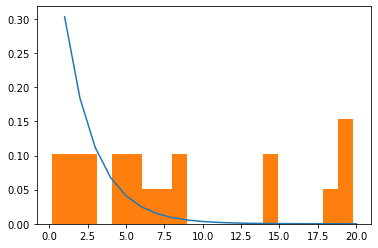

In [2]:
x = np.linspace(1, 20, 20)
plt.plot(x, 0.5 *  np. exp(-0.5*x) )
di = np.random.uniform(0, 20, 20)
plt.hist(di, bins = 20, density = True)
plt.show()

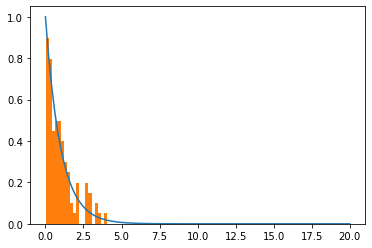

In [3]:
x = np.linspace(0, 20, 100)
plt.plot(x, 1 *  np. exp(-1*x) )
di = np.random.exponential(1,100)
plt.hist(di, bins = 20, density = True)
plt.show()